In [9]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


In [10]:
import numpy as np
import os

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
import sklearn
from sklearn.datasets import load_sample_image

# Exercise 1 : TensorFlow Implementaion(Filters)

In [13]:
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])

In [14]:
batch_size, height, width, channels = images.shape
print("batch_size : ", batch_size, "\nheight * width : ", height, "*", width, "\nchannels : ", channels)

batch_size :  2 
height * width :  427 * 640 
channels :  3


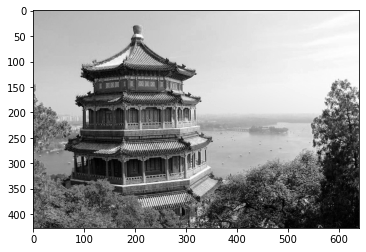

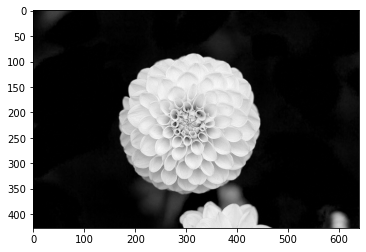

In [15]:
plt.imshow(images[0][:, :, 0], cmap = "gray")
plt.show()
plt.imshow(images[1][:, :, 0], cmap = "gray")
plt.show()

In [16]:
filters = np.zeros(shape = (7,7,channels,2), dtype=np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

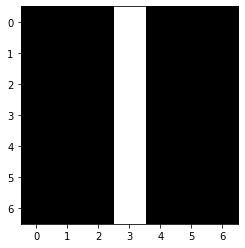

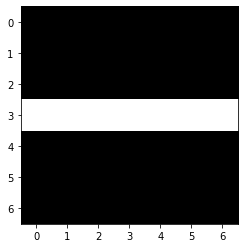

In [17]:
plt.imshow(filters[:, :, 0, 0], cmap = "gray")
plt.show()
plt.imshow(filters[:, :, 0, 1], cmap = "gray")
plt.show()

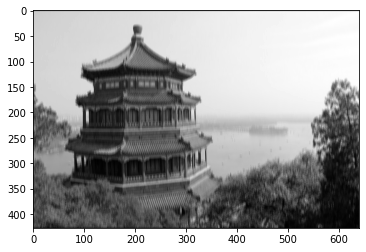

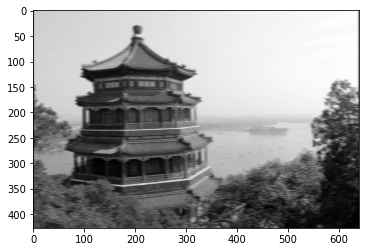

In [18]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding = "SAME")
plt.imshow(outputs[0, :, :, 0], cmap = "gray")
plt.show()
plt.imshow(outputs[0, :, :, 1], cmap="gray")
plt.show()

In [19]:
def crop(images):
    return images[150:220, 130:250]

Input


<function matplotlib.pyplot.show>

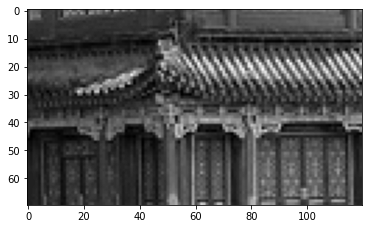

In [20]:
print("Input")
plt.imshow(crop(images[0, :, :, 0]), cmap="gray")
plt.show

china_vertical


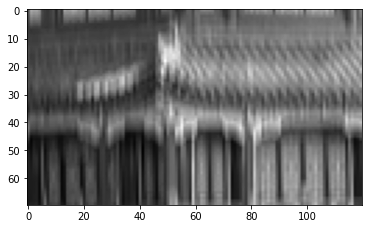

china_horizontal


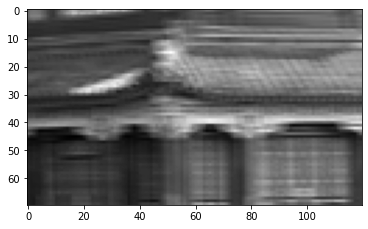

In [21]:
for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    print(filename)
    plt.imshow(crop(outputs[0, :, :, feature_map_index]), cmap="gray")
    plt.show()

# Exercise 2 : TensorFlow Implementaion(Pooling Layers)

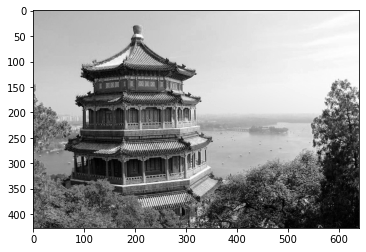

Input's H*W :  (427, 640)


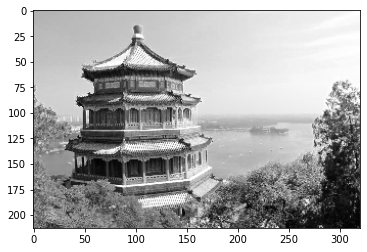

Output's H*W :  (213, 320)


In [22]:
max_pool = keras.layers.MaxPool2D(pool_size=2, dtype="float64")
outputs = max_pool(images)
plt.imshow(images[0, :, :, 0], cmap = "gray")
plt.show()
print("Input's H*W : ", images[0,:,:,0].shape)
plt.imshow(outputs[0,:,:,0],cmap="gray")
plt.show()
print("Output's H*W : ",outputs[0,:,:,0].shape)

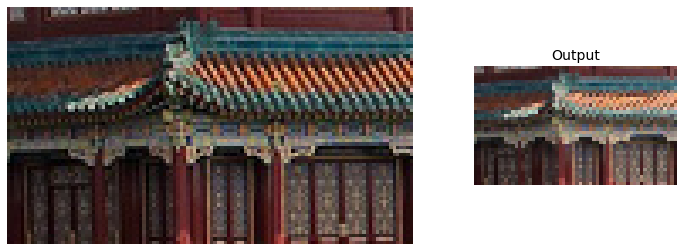

In [23]:
cropped_images = np.array([crop(image) for image in images],dtype=np.float64)
output = max_pool(cropped_images)

fig = plt.figure(figsize=(12,8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2,1])
ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(cropped_images[0])
ax1.axis("off")
ax2 = fig.add_subplot(gs[0,1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])
ax2.axis("off")
plt.show()

 run time selected NONE


In [24]:
output = tf.nn.max_pool(images, ksize=(1,1,1,3), strides=(1,1,1,3),padding="VALID")

print("image shape", images.shape)
print("output shape", output.shape)

image shape (2, 427, 640, 3)
output shape (2, 427, 640, 1)


In [25]:
depth_pool = keras.layers.Lambda(
    lambda X: tf.nn.max_pool(X, ksize=(1,1,1,3), strides=(1,1,1,3), padding="VALID"), dtype="float64")
output=depth_pool(images)
print("images : ", images.shape)
print("output : ", output.shape)

images :  (2, 427, 640, 3)
output :  (2, 427, 640, 1)


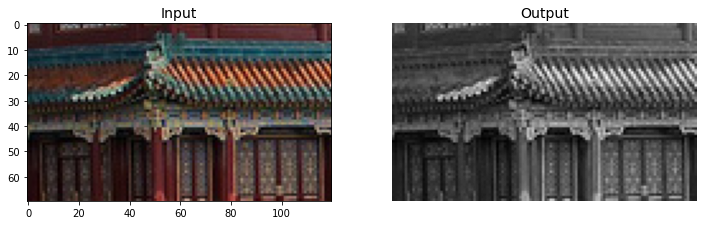

In [26]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Input", fontsize=14)
plt.imshow(cropped_images[0])
plt.subplot(1,2,2)
plt.title("Output",fontsize=14)
plt.imshow(depth_pool(cropped_images)[0,...,0], cmap="gray")
plt.axis("off")
plt.show()

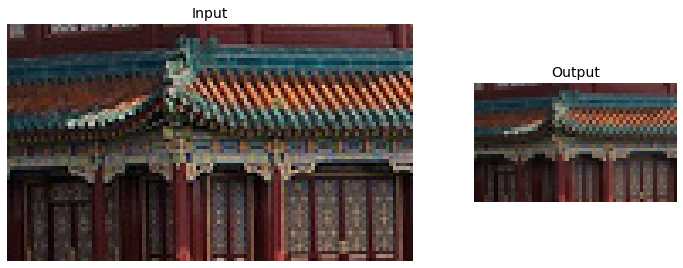

In [27]:
avg_pool = keras.layers.AvgPool2D(pool_size=2)
output_avg = avg_pool(cropped_images)
fig = plt.figure(figsize = (12,8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2,1])
ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(cropped_images[0])
ax1.set_title("Input",fontsize=14)
ax1.axis("off")
ax2 = fig.add_subplot(gs[0,1])
ax2.set_title("Output",fontsize=14)
ax2.imshow(output_avg[0])
ax2.axis("off")
plt.show()

In [28]:
global_avg_pool = keras.layers.GlobalAvgPool2D(dtype="float64")
output = global_avg_pool(images)
print("images :", images.shape)
print("outpuit :", output.shape)

images : (2, 427, 640, 3)
outpuit : (2, 3)


In [29]:
global_avg_pool = keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis=[1,2]),dtype="float64")
output = global_avg_pool(images)
print("images :",images.shape)
print("output :", output.shape)

images : (2, 427, 640, 3)
output : (2, 3)


# Exercise 3 : CNN Architectures

Run time -> GPU

In [18]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [32]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(64, 7, activation="relu",padding="same",input_shape=[28,28,1]),
                                 keras.layers.MaxPooling2D(2),
                                 keras.layers.Conv2D(128,3,activation="relu",padding="same"),
                                 keras.layers.Conv2D(128,3,activation="relu",padding="same"),
                                 keras.layers.MaxPooling2D(2),
                                 keras.layers.Conv2D(256,3,activation="relu",padding="same"),
                                 keras.layers.Conv2D(256,3,activation="relu",padding="same"),
                                 keras.layers.MaxPooling2D(2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation="relu"),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(64, activation="relu"),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(10, activation="softmax")                           
])

In [33]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [23]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 41s 22ms/step - loss: 0.7042 - accuracy: 0.7537 - val_loss: 0.3916 - val_accuracy: 0.8652
Epoch 2/10
1719/1719 [==============================] - 37s 22ms/step - loss: 0.4228 - accuracy: 0.8596 - val_loss: 0.3289 - val_accuracy: 0.8830
Epoch 3/10
1719/1719 [==============================] - 37s 22ms/step - loss: 0.3580 - accuracy: 0.8788 - val_loss: 0.2948 - val_accuracy: 0.8912
Epoch 4/10
1719/1719 [==============================] - 38s 22ms/step - loss: 0.3277 - accuracy: 0.8901 - val_loss: 0.2838 - val_accuracy: 0.8982
Epoch 5/10
1719/1719 [==============================] - 37s 21ms/step - loss: 0.3093 - accuracy: 0.8955 - val_loss: 0.3056 - val_accuracy: 0.8990
Epoch 6/10
1719/1719 [==============================] - 37s 21ms/step - loss: 0.2860 - accuracy: 0.9022 - val_loss: 0.2919 - val_accuracy: 0.9038
Epoch 7/10
1719/1719 [==============================] - 37s 21ms/step - loss: 0.2751 - accuracy: 0.9053 - val_loss: 0.2636 -

# Exercise 4 : Build your own CNN from scratch and try to achieve the highest possible accuracy

In [35]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(64,7,activation="relu", padding="same",
                                 input_shape=[28,28,1]),
                                 keras.layers.MaxPooling2D(2),
                                 keras.layers.Conv2D(128, 3, activation="relu", padding = "same"),
                                 keras.layers.Conv2D(128, 3, activation="relu", padding = "same"),
                                 keras.layers.MaxPooling2D(2),
                                 keras.layers.Conv2D(256, 3, activation="relu", padding = "same"),
                                 keras.layers.Conv2D(256, 3, activation="relu", padding = "same"),
                                 keras.layers.MaxPooling2D(2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation="relu"),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(64, activation="relu"),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(10, activation="softmax")
])

In [34]:
class MyModel(tf.keras.Model):
    def __init__(self):
        # call the present constructor
        super(MyModel, self).__init__()
        # initalize the layers

    def call(self, x):

        return x

model = MyModel()

In [36]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 39s 22ms/step - loss: 0.7271 - accuracy: 0.7476 - val_loss: 0.3978 - val_accuracy: 0.8580
Epoch 2/10
1719/1719 [==============================] - 37s 22ms/step - loss: 0.4280 - accuracy: 0.8564 - val_loss: 0.3378 - val_accuracy: 0.8790
Epoch 3/10
1719/1719 [==============================] - 37s 21ms/step - loss: 0.3663 - accuracy: 0.8773 - val_loss: 0.3275 - val_accuracy: 0.8842
Epoch 4/10
1719/1719 [==============================] - 37s 22ms/step - loss: 0.3356 - accuracy: 0.8853 - val_loss: 0.2862 - val_accuracy: 0.9016
Epoch 5/10
1719/1719 [==============================] - 37s 22ms/step - loss: 0.3126 - accuracy: 0.8950 - val_loss: 0.2805 - val_accuracy: 0.9036
Epoch 6/10
1719/1719 [==============================] - 37s 21ms/step - loss: 0.2940 - accuracy: 0.9007 - val_loss: 0.3101 - val_accuracy: 0.8930
Epoch 7/10
1719/1719 [==============================] - 37s 22ms/step - loss: 0.2821 - accuracy: 0.9044 - val_loss: 0.3098 -